<img style="float: right;" src="./img/es2_logo_tiny.jpg"></img>

# 02-Using Web Coverage Service (WCS) From Python

<a href="./01-WCS_intro.ipynb"><< 01-WCS intro </a>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space> <a href="./03-WCS_in_qgis.ipynb ">03-WCS in QGIS >></a>

<h2>OWSLIB Library</h2>

<p>The OWSLib library is a python library that makes accessing data and metadata through OGC services possible.  The library abstracts all of teh traditional HTTP API calls into programatic function calls. Here i will showcase the use of the WebCoverageService class</p>
<p>The libraray is available from GitHub @ <a href="https://github.com/earthserver-eu/OWSLib">https://github.com/earthserver-eu/OWSLib</a>

<h2>OWSLIB - Getting Started</h2>
<p>To initiate the WebCoverageService class you pass in the URL endpoint for the service and the version of the standard that you wish to use. For these examples we will be using WCS 2. To test everything has worked you can print a list of available coverages</p>


In [5]:
from owslib.wcs import WebCoverageService

my_wcs = WebCoverageService('http://earthserver.pml.ac.uk/rasdaman/ows?', version='2.0.0')

# print out coverages that have CCI in title
for coverage_name in my_wcs.contents.keys():
    if 'CCI' in coverage_name:
        print coverage_name


http://earthserver.pml.ac.uk/rasdaman/ows?service=WCS&request=GetCapabilities&version=2.0.0
CCI_V2_monthly_chlor_a_rmsd
CCI_V2_monthly_Rrs_490
CCI_V2_monthly_Rrs_555
CCI_V2_monthly_Rrs_510
CCI_V2_monthly_Rrs_670
CCI_V2_monthly_rrs_555
CCI_V2_monthly_Rrs_412
CCI_V2_monthly_Rrs_443
CCI_V2_monthly_rrs_490
V2_monthly_CCI_chlor_a_insitu_test
CCI_V2_monthly_rrs_670
V2_daily_CCI_chlor_a_insitu_test
CCI_V2_monthly_rrs_510
V1_monthly_CCI_chlor_a_insitu_test
CCI_V2_monthly_rrs_412
CCI_V2_monthly_rrs_443
CCI_V2_monthly_chlor_a_bias
CCI_V2_release_chlor_a_log10_bias
V1_monthly_CCI_silly_2d_test
V2_daily_CCI_chlor_a_insitu_test_for_vlad
V1_monthly_CCI_test_for_alex
CCI_V2_release_chlor_a
CCI_V2_release_daily_chlor_a
CCI_V2_monthly_chlor_a


<h2>Accessing information about a single Coverage</h2>
<p>Once you have created your service object it is possible to then get information about a single coverage. This information will then allow you to know interact with the coverage.  To access a single coverage we use the WebCoverageService object contents parameter and use the coverage name as a key.</p>

In [6]:
print my_wcs.contents['CCI_V2_release_chlor_a']

In [29]:
for item in dir(my_wcs.contents['CCI_V2_release_chlor_a']):
    if "_" not in item:
        print item

abstract
axisDescriptions
boundingBox
boundingBoxWGS84
boundingboxes
crsOptions
defaulttimeposition
descCov
grid
id
keywords
styles
supportedCRS
supportedFormats
timelimits
timepositions
title


In [27]:
my_wcs.contents['CCI_V2_release_chlor_a'].boundingboxes

[{'bbox': (-89.99998982527396,
   -180.00003560845465,
   89.99998982507805,
   180.00003560789736),
  'nativeSrs': 'http://earthserver.pml.ac.uk/def/crs-compound?1=http://earthserver.pml.ac.uk/def/crs/EPSG/0/4326&2=http://earthserver.pml.ac.uk/def/crs/OGC/0/AnsiDate'}]

In [20]:
for item in dir(my_wcs.contents['CCI_V2_release_chlor_a'].grid):
    if "_" not in item:
        print item + ": " + str(my_wcs.contents['CCI_V2_release_chlor_a'].grid.__dict__[item])

axislabels: ['Long', 'Lat', 'ansi']
dimension: 3
highlimits: ['8639', '4319', '143']
lowlimits: ['0', '0', '0']
offsetvectors: [['0', '0.0416666749093', '0'], ['-0.0416666619561', '0', '0'], ['0', '0', '1']]
origin: ['89.9791564941', '-179.979202271', '145762.99930555557']


<p>We can also get information about the data formats that are available for teh chosen covergae by looking at teh supported formats property</p>

In [21]:
my_wcs.contents['CCI_V2_release_chlor_a'].supportedFormats

['application/netcdf',
 'image/jp2',
 'image/tiff',
 'application/gml+xml',
 'image/png']

<p>For coverages that have a time element we can get a listing of all available time steps using the timepositions property. To illustrate this we will print out teh first 10 available time steps and convert them to a readable ISO format</p>

In [26]:
for time in my_wcs.contents['CCI_V2_release_chlor_a'].timepositions[0:10]:
    print time.isoformat()
    

finding irregular times
2000-01-31T00:00:00
2000-02-29T00:00:00
2000-03-31T00:00:00
2000-04-30T00:00:00
2000-05-31T00:00:00
2000-06-30T00:00:00
2000-07-31T00:00:00
2000-08-31T00:00:00
2000-09-30T00:00:00
2000-10-31T00:00:00


<h2>Accessing data using the information about a Coverage</h2>

<p>With the information we have gathered from the coverage object we can build a GetCoverage request. The request will give us a file type objet that we can either use in memory or you can save it to disk for future analysis</p>

WCS 2.0.0 DEBUG: Second part of URL: format=application%2Fnetcdf&version=2.0.0&request=GetCoverage&service=WCS&CoverageID=CCI_V2_monthly_chlor_a&subset=Long%28-10%2C0%29&subset=Lat%2840%2C50%29&subset=ansi%28%222000-07-31T00%3A00%3A00%22%2C%222000-08-31T00%3A00%3A00%22%29
http://earthserver.pml.ac.uk/rasdaman/ows
(239, 241)


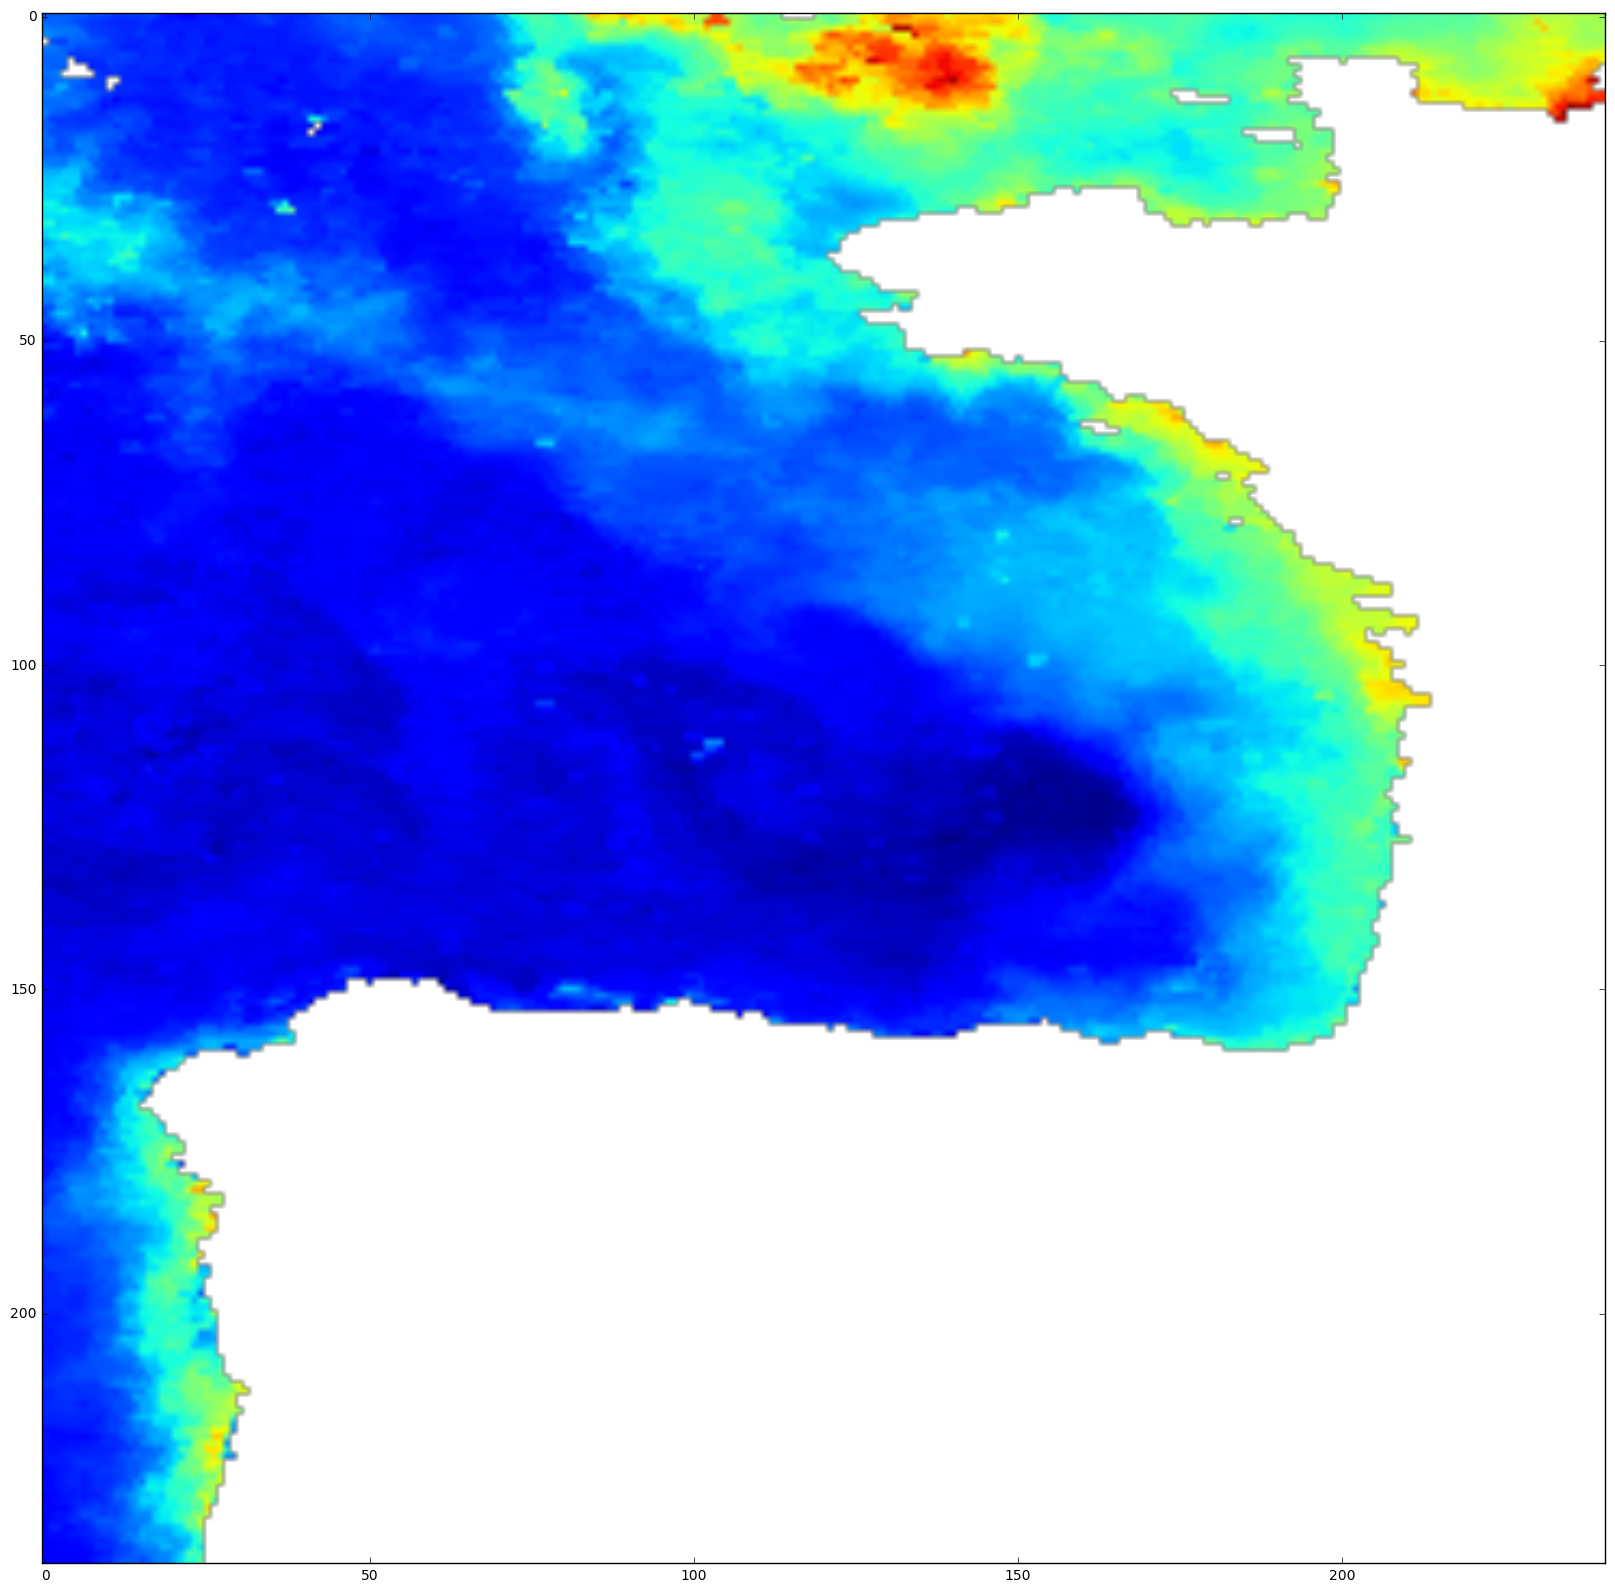

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import netCDF4 as nc


coverage_file = my_wcs.getCoverage(identifier=['CCI_V2_monthly_chlor_a'], format='application/netcdf', subsets=[('Long',-10,0), ('Lat',40,50),('ansi',"2000-07-31T00:00:00","2000-08-31T00:00:00")])

with open('testout.nc', 'w') as outfile:
    outfile.write(coverage_file.read())
    
ncdata = nc.Dataset("testout.nc", "a", format="NETCDF4")
ncdata.variables['chlor_a'].setncattr('missing_value', 9.969209968386869e+36)
data = np.flipud(np.rot90(ncdata.variables['chlor_a'][:,:,0]))
print data.shape



plt.figure(figsize=(40,20))
plt.imshow(data,norm=colors.LogNorm()) 